In [1]:
# ! pip install numpy pandas matplotlib seaborn scikit-learn plotly

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('./height-weight.csv')
df

Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

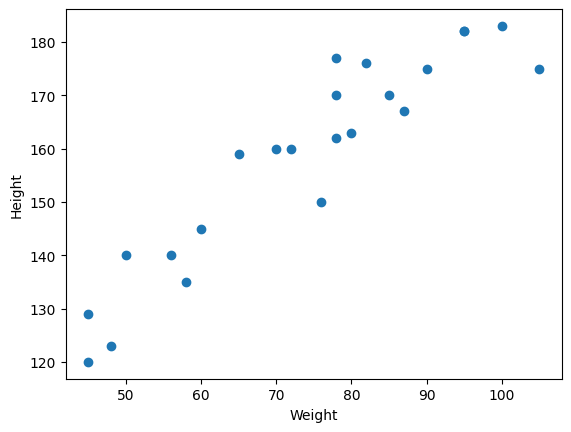

In [6]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
# finding correlation
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

- highly correlated

<Axes: >

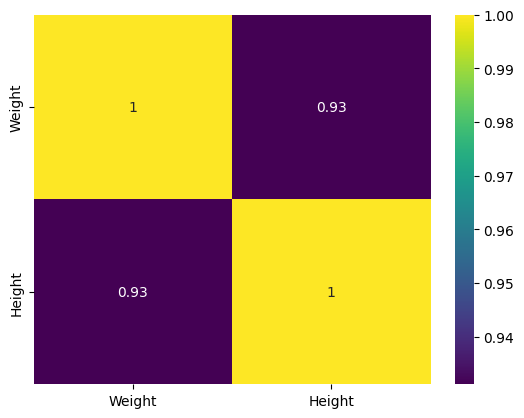

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

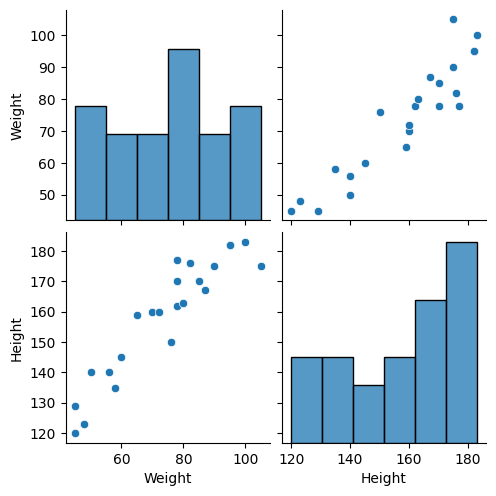

In [11]:
sns.pairplot(df)

# Dividing Independendent and Dependent feature
- Independent should be DataFrame/2D Form
- Dependent should be Series/1D Form

In [22]:
X = df['Weight']

In [23]:
type(X)

pandas.core.series.Series

In [24]:
X = df[['Weight']]
type(X)

pandas.core.frame.DataFrame

In [26]:
y = df['Height']

In [25]:
X

Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72

In [27]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17, 1) (6, 1) (17,) (6,)


# Standardization
- if we tried apply get global minima it would take time to reach/find it from datapoint cause it apply math to bigger value, which takes time.
- So we use standization(z-score) - which converts a independent feature into **`(Mean = 0 and Std = 1)`**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

# Apply Simple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression(n_jobs=-1)

In [45]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

# Finding slope and intercept
- 1 unit movement in weight value it leads to 17.29 unit movement in height
- when 156 point meeting intercept

In [50]:
print(f'Coeficient Or Slope: {reg.coef_}')

Coeficient Or Slope: [17.2982057]


In [51]:
print(f'Intercept: {reg.intercept_}')

Intercept: 156.47058823529412


# Plotting BFL - Best Fit Line & Predicting Train data

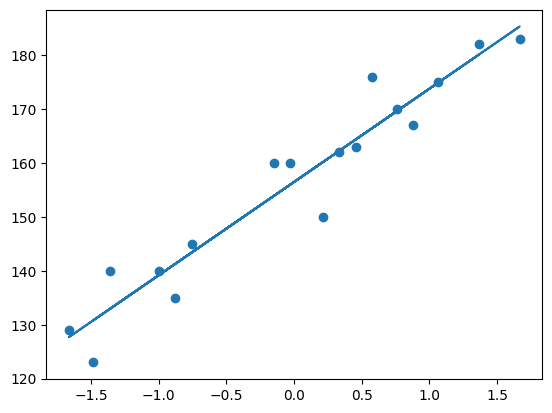

In [54]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train))

# Predicting Test data
1. predicted height output = intercept + coef * weights
2. y_pred = 156.47 + 17.29 * X_test

In [55]:
y_pred = reg.predict(X_test)

In [56]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

# Performance Metrics

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'root_mean_squared_error: {rmse}')

mean_squared_error: 114.84069295228699
mean_absolute_error: 9.66512588679501
root_mean_squared_error: 10.716374991212605


# RSquare
- R^2 = 1 - SSR/SST
- R^2 = coeficient of determination SSR = sum of squares of resuidials SST = total sum of sqaures

In [59]:
from sklearn.metrics import r2_score

In [60]:
score = r2_score(y_test, y_pred)
score

0.7360826717981276

# Adjusted RSquare
- AdR^2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
- R2 = The R2 of the model n: the number of observations k: the number of predictor variables

In [61]:
1 -  (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

0.6701033397476595

# LR Using OLS

In [66]:
# ! pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.8 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.8 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.8 MB 3.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 3.4 MB/s eta 0:00:02
   ------------------------------ --------- 7.6/9.8 MB 3.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.0 MB/s eta 0:00:00


In [67]:
import statsmodels.api as sm

In [68]:
model = sm.OLS(y_train, X_train).fit()

In [71]:
model

In [69]:
prediction = model.predict(X_test)

In [70]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

# Model Summary Using OLS

In [73]:
model.summary()

c:\Users\anoop\Projects\projects-env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                       0.664
Time:                        13:10:38   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction For New Data
-Standardization - Transform 

In [75]:
reg.predict(scaler.transform([[72]]))

c:\Users\anoop\Projects\projects-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])